# Set 1: Descriptive Statistics and Probability

## Question 1

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Creating the data
data = {
    'Company': ['Allied Signal', 'Bankers trust', 'General Mills', 'ITT Industries', 'J.P. Morgan & Co', 'Lehman Brothers',
               'Marriott', 'MCI', 'Merrill Lynch', 'Microsoft', 'Morgan Stanley', 'Sun Microsystems', 'Travelers',
               'US Airways', 'Warner-Lambert'],
    'X': [24.23, 25.53, 25.41, 24.14, 29.62, 28.25, 25.81, 24.39, 40.26, 32.95, 91.36, 25.99, 39.42, 26.71, 35.00]
}

# Converting into dataframe
df = pd.DataFrame(data)
df

,Company,X
0,Allied Signal,24.23
1,Bankers trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P. Morgan & Co,29.62
5,Lehman Brothers,28.25
6,Marriott,25.81
7,MCI,24.39
8,Merrill Lynch,40.26
9,Microsoft,32.95


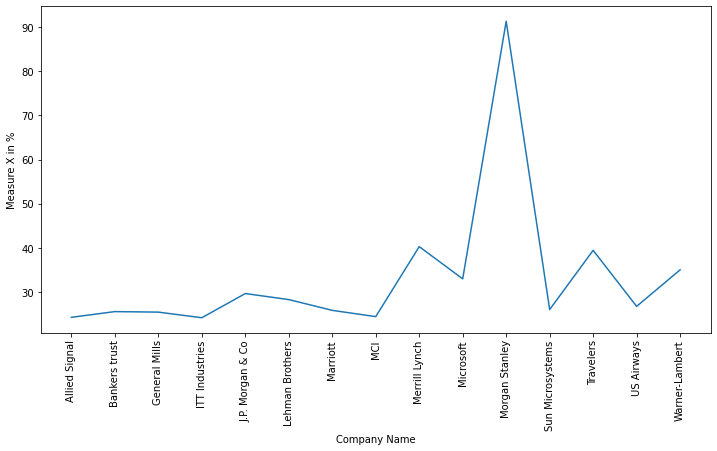

In [3]:
# Plotting the data
plt.figure(figsize = (12, 6))
plt.plot(df['Company'], df['X'])
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.ylabel('Measure X in %')
plt.show()

In [4]:
# Finding Mean, Standar deviation and Variance of Measure X
mean = np.mean(df['X'])
std = np.std(df['X'])
var = np.var(df['X'])
print('Mean (\u03BC) = ', mean)
print('Standard deviation (\u03C3) = ', std)
print('Variance (\u03C3^2) = ', var)

Mean (μ) =  33.27133333333333
Standard deviation (σ) =  16.370812590976932
Variance (σ^2) =  268.00350488888887


In [5]:
# Finding outliers
threshold = 3    # setting theshold to detect outliers

# calculate z-score
import scipy.stats as stats
from scipy.stats import norm

z = stats.norm.cdf(df['X'], loc = mean, scale = std)

out = np.abs(z > threshold)
out

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

No outliers present in the data.

## Question 5 (iii) and (iv)

In [6]:
prob = {
    'x': [-2000, -1000, 0, 1000, 2000, 3000],
    'P(x)': [0.1, 0.1, 0.2, 0.2, 0.3, 0.1]
}

Prob = pd.DataFrame(prob)
Prob

,x,P(x)
0,-2000,0.1
1,-1000,0.1
2,0,0.2
3,1000,0.2
4,2000,0.3
5,3000,0.1


In [7]:
m = np.sum(Prob['x'] * Prob['P(x)'])
print('Ans (iii). Long term average earning = ', m)

v = np.sum((Prob['x'] - m)**2 * Prob['P(x)'])
print('Ans (iv). Measure of risk involved = $',v )

Ans (iii). Long term average earning =  800.0
Ans (iv). Measure of risk involved = $ 2160000.0


# Set 2: Normal Distribution, Functions of Random Variables

## Question 1

The time required for servicing transmissions is normally distributed with mu = 45 minutes and sigma = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [8]:
# According to the question
mean = 45
std = 8

# X = 10 + Y that is, Time to start working after drop-off + Service time

# To find P(X > 60), that is the time where manager cannot make commitment
# P(X > 60) =  P(10 + Y > 60) = P(Y > 50)

Y = 50      # Sample data

# Calculate z-score
z = stats.norm.cdf(50, loc=mean, scale=std)
print('Probability that commitment will be met = ', z)

Probability that commitment will be met =  0.7340144709512995


In [9]:
print('ANS. Probability that commitment wont be met = ', 1-z)

ANS. Probability that commitment wont be met =  0.26598552904870054


## Question 2

The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean  = 38 and Standard deviation  =6. For each statement below, please specify True/False. If false, briefly explain why.

A.	More employees at the processing center are older than 44 than between 38 and 44.

B.	A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.


In [10]:
# Part A

m = 38     # mean
s = 6      # std dev

# For employees older than 44
z_44 = (44 - m)/s
print(z_44)

1.0


Using standard normal table, for z > 1 : P = 0.1587

In [11]:
# For employees between 38 and 44
z_38 = (38 - m)/s
z_38

0.0

Probabilities of z < 1 = 0.8413 (P (X < 44)) and for z > 0 = 0.5 (P(X > 38)) through standard normal z table

So, P (38 < X < 44) = 0.8413 - 0.5 = 0.3414
Therefore, statement A is FALSE as the probability of employees aging between 38 and 44 is more. 

In [12]:
# Part B

# z score of employees under age 30
z_30 = (30 - m)/s
z_30

-1.3333333333333333

Probability at z < -1.33 is 0.0918 through standard z table

In [13]:
# Expected no. of employees
E = 0.0918 * 400
print('Expected employees under age 30 = ', round(E, 1) ,'(about 36)')

Expected employees under age 30 =  36.7 (about 36)


Statement B is TRUE.

## Question 4

Let X ~ N(100, 20^2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

In [14]:
m = 100    # mean
s = 20     # standard deviation


From the above details,we have to excluded area of .005 in each of the left and right tails. Hence, we want to find the 0.5th and the 99.5th percentiles Z score values

In [15]:
#  score at 0.5th percentile
z_5 = stats.norm.ppf(0.005)

# score at 99.5th percentile
z_99 = stats.norm.ppf(0.995)

def sample(z):
    x = (20 * z) + 100    # from z score formula
    return x

a = sample(z_5)
print('a = ', a)

b = sample(z_99)
print('b = ', b)

a =  48.483413929021985
b =  151.516586070978


## Question 5

Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3^2) and Profit2 ~ N(7, 4^2) respectively. Both the profits are in  $$Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45

A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

B.	Specify the 5th percentile of profit (in Rupees) for the company

C.	Which of the two divisions has a larger probability of making a loss in a given year?


In [16]:
# Mean profits from two different divisions of a company = Mean1 + Mean2
Mean = 5+7
print('Mean Profit = Rs', Mean*45,'Million')

Mean Profit = Rs 540 Million


In [17]:
# Variance of profits from two different divisions of a company = std^2 = 1std^2 + 2std^2
SD = np.sqrt((9)+(16))
print('Standard Deviation = Rs', SD*45, 'Million')

Standard Deviation = Rs 225.0 Million


In [18]:
# PART A

print('Range is Rs',(stats.norm.interval(0.95,540,225)),' Millions')

Range is Rs (99.00810347848784, 980.9918965215122)  Millions


In [19]:
# PART B

# To compute 5th Percentile, we use the formula X=μ + Zσ; wherein from z table, 5 percentile = -1.645
X= 540+(-1.645)*(225)
print('5th percentile of profit (in Million Rupees) is',np.round(X,))

5th percentile of profit (in Million Rupees) is 170.0


In [20]:
# PART C

# Probability of Division 1 making a loss P(X<0)
p = stats.norm.cdf(0,5,3)
print(p)
# Probability of Division 2 making a loss P(X<0)
pp = stats.norm.cdf(0,7,4)
print(pp)

0.0477903522728147
0.040059156863817086


Division 1 makes larger probability of loss

# Set 3 : Confidence Intervals

## Question 5 (PART I)

In [21]:
# According to the question
n = 2000       # sample size
x = 0.046      #  sample mean = 4.6%

# If Mozilla has less than 5% share in market, then
# Find the proportion of web users using Mozilla at 95% confidence interval

# Calculate z-score at 95% C.I.
alpha = 0.05   # CI = 1 - alpha where, CI = 0.95

z = stats.norm.ppf(1 - alpha/2)
z

1.959963984540054

In [22]:
# The range of proportions of people using Mozilla at 95% confidence interval
M = (x - z * math.sqrt(x * (1-0.046)/n) , x + z * math.sqrt(x * (1-0.046)/n))    # Std Dev = (1 - 0.046)^2 
M

(0.03681908014174666, 0.05518091985825334)

Range of proportions is between 3.68% - 5.51%. We can conclude that Mozilla has less than 5% share in market

## Question 8

In [23]:
# According to the question
m = 0.04     # margin of error
a = b = 0.5  # assumed standard deviation

# At 95% confidence interval
alpha = 0.05   # CI = 1 - alpha where, CI = 0.95

z = stats.norm.ppf(1 - alpha/2)
z

1.959963984540054

In [24]:
# From margin of error formula, ME = z * sqrt(a * b/n)

n = ((z ** 2) * a * b)/(m)**2    
print('Randomly selected employees to be contacted to gurantee marin of error not more than 4% = ', round(n))

Randomly selected employees to be contacted to gurantee marin of error not more than 4% =  600


Ans. Option A. 600

## Question 9

In [25]:
# At 98% confidence interval
alpha = 0.02

z = stats.norm.ppf(1 - alpha/2)
z

2.3263478740408408

In [26]:
# From margin of error formula, ME = z * sqrt(a * b/n)

n = ((z ** 2) * a * b)/(m)**2    
print('Randomly selected employees to be contacted to gurantee marin of error not more than 4% = ', round(n))

Randomly selected employees to be contacted to gurantee marin of error not more than 4% =  846


Ans. Option C. 848 (Approx.)

# Set 4 : Sampling Distributions and Central Limit Theorem (CBA Pratice problem set 2)

## Question 3

In [29]:
# According to the question
x = 50      # population mean
std = 40    # sample standard deviation
n = 100     # sample size
df = n - 1  # degree of freedom

# To find probability that no investigation will take place if $45 < mean transaction < $55, and investigation will take place otherwise
# We will perform t-test as population std is unknown

t_45 = (45 - x)/(std/math.sqrt(n))

t_55 = (55 - x)/(std/math.sqrt(n))

# Calculate respective probabilities of no investigation

p_45 = stats.t.cdf(t_45, df = df)

p_55 = stats.t.cdf(t_55, df = df)

# Resultant probability
p = p_55 - p_45

#So, probability % that investigation will happen
P = (1 - p) * 100

print('Probability that in any given week there will be investigation = ', np.round(P,1), '%')

Probability that in any given week there will be investigation =  21.4 %


Ans. Option D : 21.1 %

## Question 4

In [ ]:
# From the previous question

x = 50      # population mean
std = 40    # sample standard deviation

x_bar = 45  # sample mean

# Calculate t-stats
t = stats.t.ppf(1 - 0.05/2, df)    # Since probability of invesigation = 5% or 0.05

# From t-stats formula
# t = (x_bar - x)/(std/sqrt(n))


Here degree of freedom is unknown to us, so we can't calculate t-stats and hence cannot find the minimum no. of transaction as per question.

Ans. E. Not enough information